In [1]:
#importing libraries
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
# this allows the plots to be shown automatically without the need for plt.show().

matplotlib.rcParams['figure.figsize']=(10,5) 
#Adjusting the configuration of the plots we will create

pd.set_option('display.max_columns',None)
#display all columns

pd.set_option('display.max_rows',None)
#display all rows

In [2]:
#Reading in the data
df=pd.read_csv('movies.csv')

#Looking at the data
df.head() 

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
#checking if there is any missing data

for col in df.columns:
    prcnt_missing = np.mean(df[col].isnull())
    print(f'{col} - {prcnt_missing}%')

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


##### - There are some missing values, we can delete them or we can replace them with the mean.

In [4]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [5]:
#calculate the mean of "score" column,exluding NaN values
mean_score=df['score'].mean()
#replace NaN values with the mean that we calculated above
df['score'].fillna(value=mean_score,inplace=True)

#calculate the mean of "votes" column,exluding NaN values
mean_votes=df['votes'].mean()
#replace NaN values with the mean that we calculated above
df['votes'].fillna(value=mean_votes,inplace=True)

#calculate the mean of "budget" column,exluding NaN values
mean_budget=df['budget'].mean()
#replace NaN values with the mean that we calculated above
df['budget'].fillna(value=mean_budget,inplace=True)

#calculate the mean of "gross" column,exluding NaN values
mean_gross=df['gross'].mean()
#replace NaN values with the mean that we calculated above
df['gross'].fillna(value=mean_gross,inplace=True)

#calculate the mean of "runtime" column,exluding NaN values
mean_runtime=df['runtime'].mean()
#replace NaN values with the mean that we calculated above
df['runtime'].fillna(value=mean_runtime,inplace=True)

In [6]:
#changing data type of columns

df['budget']=df['budget'].astype('int64')
df['gross']=df['gross'].astype('int64')


##### 'rating','released','writer','star','country','company' columns aren't replacable with the mean . In this case I think that the best solution is deleting rows with null values to have a cleaner data.

In [7]:
df=df.dropna(subset=['rating','released','writer','star','country','company'])

In [8]:
#checking AGAIN if there is any missing data
for col in df.columns:
    prcnt_missing = np.mean(df[col].isnull())
    print(f'{col} - {prcnt_missing}%')

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [9]:
# Sorting the DataFrame by the 'gross' column in descending order
df = df.sort_values(by=['gross'],inplace=False,ascending = False)

# This operation does not modify the original DataFrame by default (inplace=False).
# If we want to modify the DataFrame in place, we have to set inplace=True.
# The resulting DataFrame will be a new DataFrame with rows sorted by 'gross'.

In [10]:
#The 'released' column comes with a text format date and the country of release.
#What I did was to split the column in two : Release date and Country release. 
df[['released','country_release']] = df['released'].str.split(' \(',n=1,expand=True)

#cleaning a little bit the 'country_release' column
df['country_release'] = df['country_release'].str.replace(')','')

#giving the 'released' column the datetime format
df['released'] = pd.to_datetime(df['released'],format='mixed')

In [11]:
#Drop any duplicates

df.drop_duplicates()
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,country_release
5445,Avatar,PG-13,Action,2009,2009-12-18,7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,United States
7445,Avengers: Endgame,PG-13,Action,2019,2019-04-26,8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,United States
3045,Titanic,PG-13,Drama,1997,1997-12-19,7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,United States
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,2015-12-18,7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,United States
7244,Avengers: Infinity War,PG-13,Action,2018,2018-04-27,8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,United States


In [12]:
#reset index
df.reset_index(drop=True,inplace=True)
#resetting the index of the DataFrame df and modifying it in place.
#After this operation, the DataFrame will have a new default integer index, 
#and the previous index (if any) will be discarded.
#The drop=True ensures that the old index is not kept as a regular column in the DataFrame.
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,country_release
0,Avatar,PG-13,Action,2009,2009-12-18,7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,United States
1,Avengers: Endgame,PG-13,Action,2019,2019-04-26,8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,United States
2,Titanic,PG-13,Drama,1997,1997-12-19,7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,United States
3,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,2015-12-18,7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,United States
4,Avengers: Infinity War,PG-13,Action,2018,2018-04-27,8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,United States


## ScatterPlot with 'gross' vs 'budget'

Text(0.5, 1.0, 'Gross vs Budget Earnings')

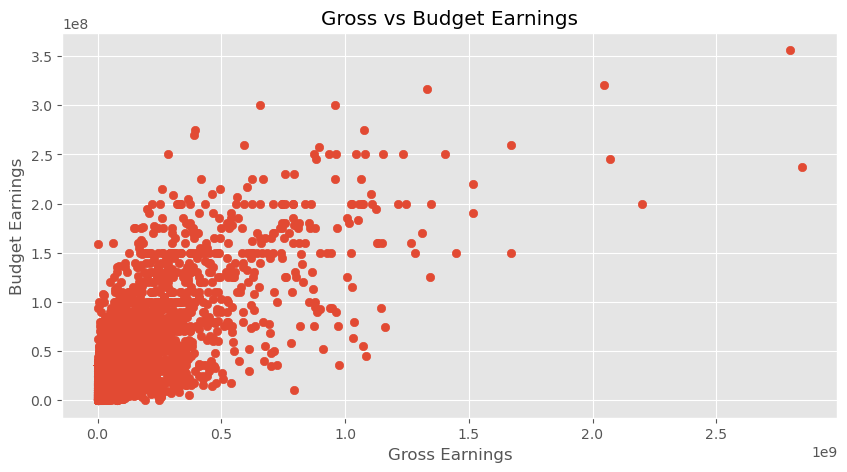

In [13]:
plt.scatter(x=df['gross'],y=df['budget'])
plt.xlabel('Gross Earnings')
plt.ylabel('Budget Earnings')
plt.title('Gross vs Budget Earnings')

<Axes: xlabel='gross', ylabel='budget'>

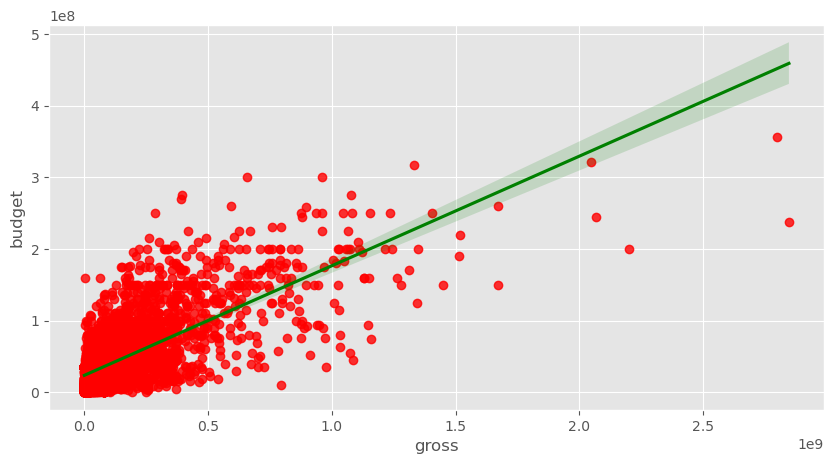

In [14]:
#Plot gross vs budget using seaburn
sns.regplot(x=df['gross'],y=df['budget'],
            scatter_kws={"color":"red"},line_kws={"color":"green"})

In [15]:
#Creating a copy of df only with numeric values to see correlations
df_numeric = df[['budget','gross','runtime','score','votes','year']].copy()
df_numeric.head()

,budget,gross,runtime,score,votes,year
0,237000000,2847246203,162.0,7.8,1100000.0,2009
1,356000000,2797501328,181.0,8.4,903000.0,2019
2,200000000,2201647264,194.0,7.8,1100000.0,1997
3,245000000,2069521700,138.0,7.8,876000.0,2015
4,321000000,2048359754,149.0,8.4,897000.0,2018


In [16]:
#Looking at correlation
df_numeric.corr(method='pearson')

,budget,gross,runtime,score,votes,year
budget,1.000000,0.712561,0.265934,0.064654,0.421218,0.268848
gross,0.712561,1.000000,0.241618,0.185084,0.629325,0.254159
runtime,0.265934,0.241618,1.000000,0.400526,0.309353,0.120810
score,0.064654,0.185084,0.400526,1.000000,0.411938,0.102154
votes,0.421218,0.629325,0.309353,0.411938,1.000000,0.226789
year,0.268848,0.254159,0.120810,0.102154,0.226789,1.000000


In [17]:
#High correlation between gross and budget
#I was right

## Correlation HeatMap

Text(0.5, 1.0, 'Correlation Matrix for Numeric Features')

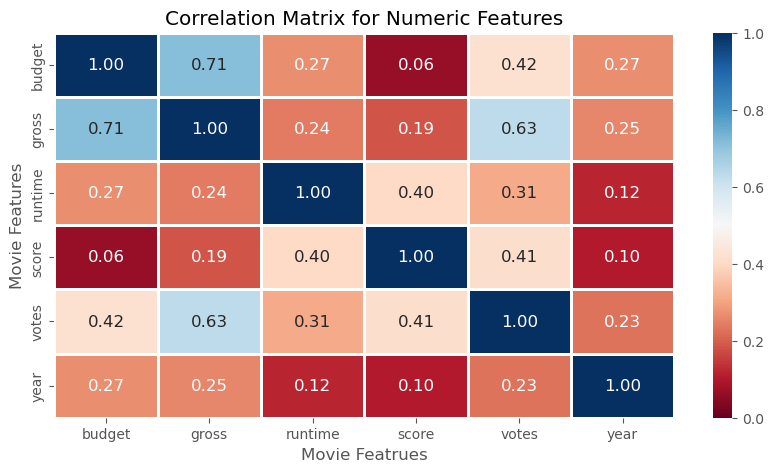

In [18]:
correlation_matrix = df_numeric.corr(method='pearson')
sns.heatmap(correlation_matrix, cmap='RdBu', vmin=0, vmax=1, annot=True, fmt=".2f", linewidths=1, annot_kws={"size": 12})
plt.xlabel('Movie Featrues')
plt.ylabel('Movie Features')
plt.title('Correlation Matrix for Numeric Features')
#if this is not working for you(only the first row is shown in heatmap) the reason is the matplotlib's or seaborn's versions

In [19]:
corr_pairs=correlation_matrix.unstack()
sorted_pairs=corr_pairs.sort_values()

sorted_pairs.head()

score    budget    0.064654
budget   score     0.064654
score    year      0.102154
year     score     0.102154
runtime  year      0.120810
dtype: float64

In [20]:
high_corr = sorted_pairs[((sorted_pairs)> 0.5) & ((sorted_pairs)!=1)]
high_corr
#if sorted_pairs==1 it means that the columns are the same

gross   votes     0.629325
votes   gross     0.629325
budget  gross     0.712561
gross   budget    0.712561
dtype: float64